# Coronary heart disease
## 1. Exploratory Analysis

Stole some plots from here: https://www.kaggle.com/code/sanchman/heart-failure-prediction-93-rec-88-acc-89-f1

### 1.1 Info and Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import math
from scipy import stats

In [2]:
# Loading Data
df = pd.read_csv('train_val_split.csv')
display(df.head())
display(df.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


None

In [3]:
# FastingBS and Heart Disease wronly as int
df['FastingBS'] = df['FastingBS'].astype('object')
df['HeartDisease'] = df['HeartDisease'].astype('object')

In [4]:
# Data Exploration
display(df.describe(include="int64").round(2))
display(df.describe(include="object"))

,Age,RestingBP,Cholesterol,MaxHR
count,734.00,734.00,734.00,734.00
mean,53.52,132.06,197.59,136.17
std,9.42,18.62,108.98,25.33
min,29.00,0.00,0.00,60.00
25%,47.00,120.00,172.25,120.00
50%,54.00,130.00,222.00,138.00
75%,60.00,140.00,267.00,155.00
max,77.00,200.00,529.00,195.00


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,734,734,734,734,734,734,734
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,573,381,563,440,439,364,398


In [5]:
# Missing Values
display(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

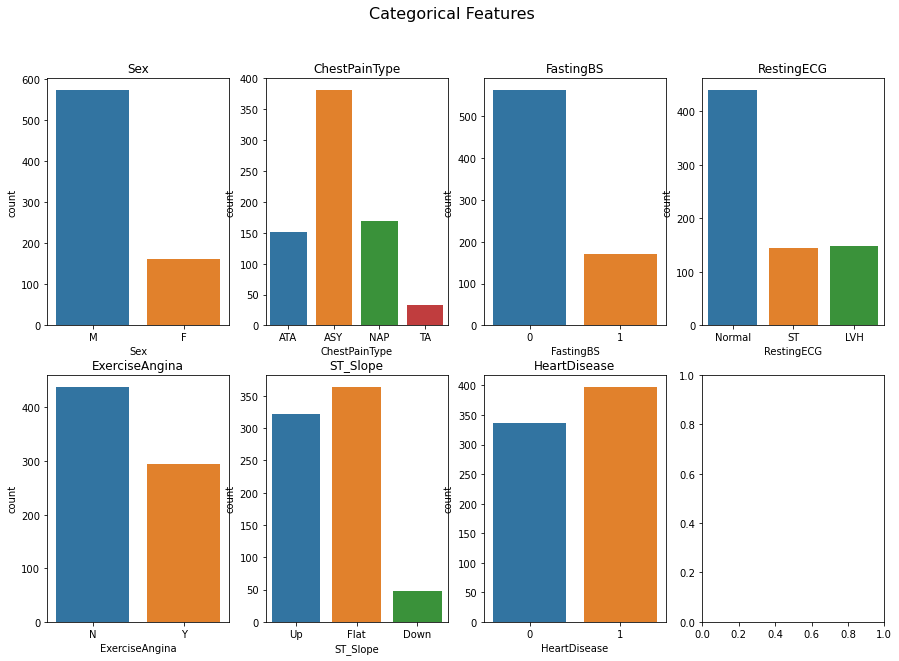

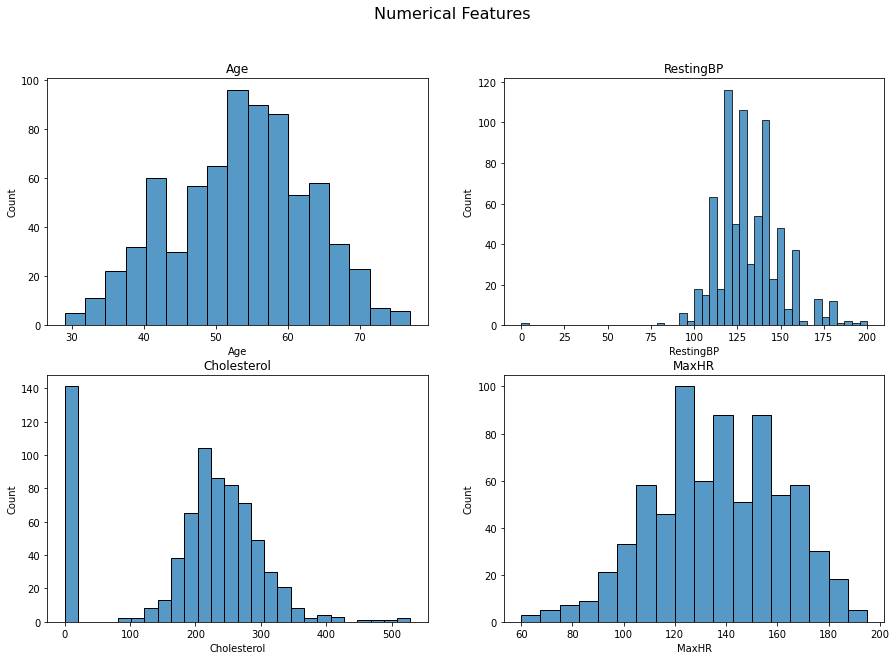

In [6]:
#Separating Categorical and Numerical Columns
categorical = df.select_dtypes(include="object").columns.tolist()
numerical = df.select_dtypes(include="int64").columns.tolist()

# Data Visualization
# Categorical Columns
fig, axs = plt.subplots(2, math.ceil(len(categorical)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(categorical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=df, ax=ax)

# Numerical Columns
fig, axs = plt.subplots(2, math.ceil(len(numerical)/2), figsize=(15, 10))
fig.suptitle('Numerical Features', fontsize=16)
for i, col in enumerate(numerical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.histplot(x=col, data=df, ax=ax)

In [7]:
print("Number of 0 in RestingBP: ", df[df["RestingBP"] == 0].shape[0])
print("Number of 0 in Cholesterol: ", df[df["Cholesterol"] == 0].shape[0])

Number of 0 in RestingBP:  1
Number of 0 in Cholesterol:  141


Categorical

- The label heart disease seems to be balanced
- Gender is very imbalanced, could have an effect
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), blood sugar levels lower for most participants
- restecg: resting electrocardiographic results normal for most

Numerical:
- Overall most are approximatly normally distributed
- Cholesterol has 141 entries with 0, maybe this is how they treated missing values
- RestingBP seems to have a weird outlier at 0, maybe also missing value
- Numerical Values are on different scales, for comparability reason one could standardize and center them but then interpretability might be lost.

Conclusion: I will remove the observations with 0 values in Cholesterol and RestingBP for the rest of the exploratory analysis, and then try different imputation methods for the models.

In [8]:
# Imputation and replacement
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed[df_preprocessed["RestingBP"] != 0]
df_preprocessed = df_preprocessed[df_preprocessed["Cholesterol"] != 0]

<h3>1.2 Statistical Relationships

<AxesSubplot:>

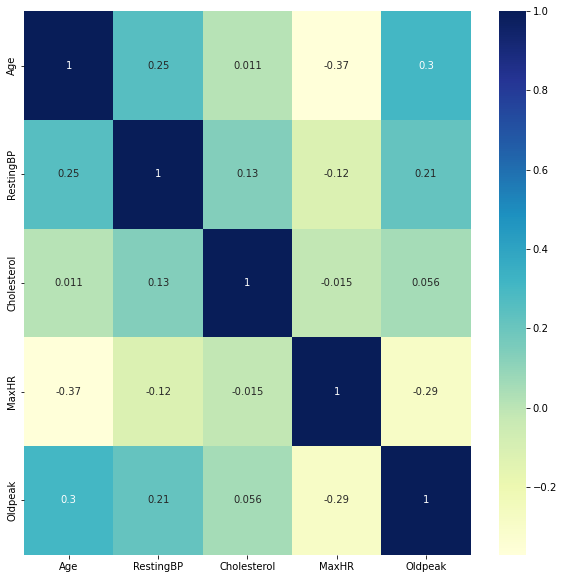

In [9]:
# Correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap="YlGnBu")

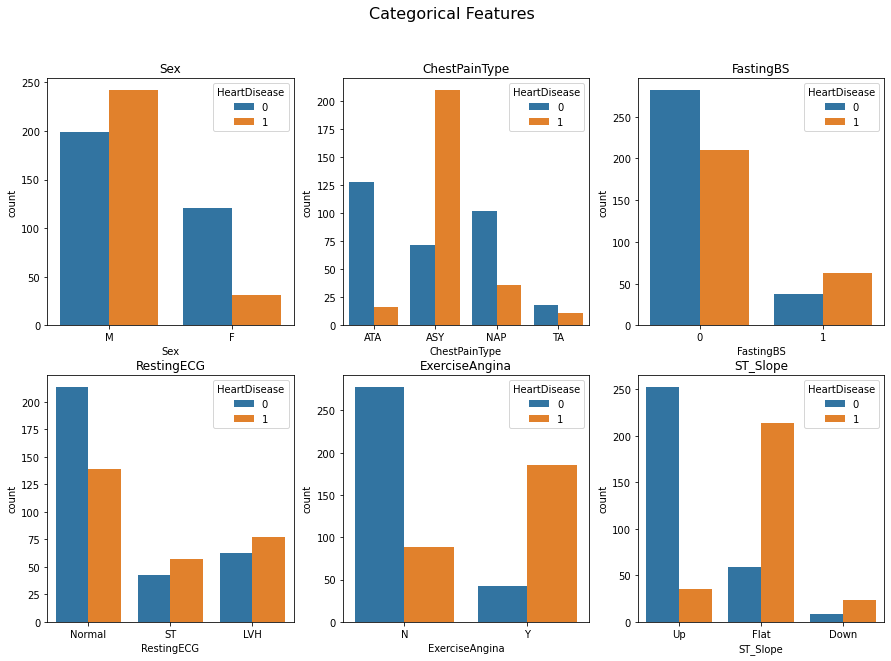

<Figure size 2160x1440 with 0 Axes>

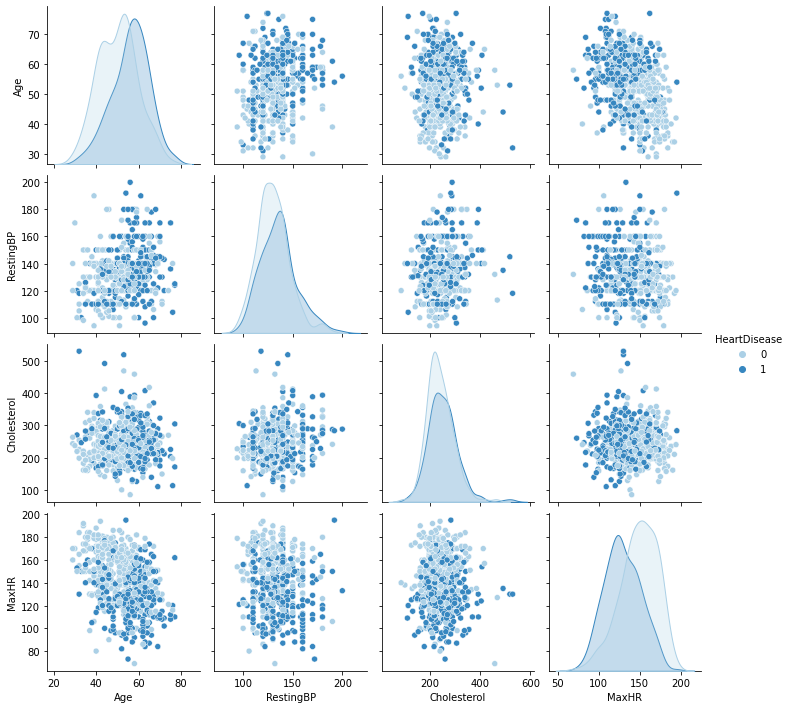

In [10]:
#Separating Categorical and Numerical Columns
categorical = df_preprocessed.select_dtypes(include="object").columns.tolist()[:-1]
numerical = df_preprocessed.select_dtypes(include="int64").columns.tolist()

# Categorical Columns
fig, axs = plt.subplots(2, math.ceil(len(categorical)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(categorical):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=df_preprocessed, ax=ax, hue="HeartDisease")

# Histogram
pairplot_vars = numerical.copy()
pairplot_vars.append('HeartDisease')
figure = plt.figure(figsize=(30,20))
sns.pairplot(df_preprocessed[pairplot_vars], hue='HeartDisease', palette='Blues')



In [11]:
# Correlations of feature and target
y = df_preprocessed["HeartDisease"]
X = df_preprocessed.drop("HeartDisease", axis=1)

# Print Biserial Correlation for Numerical Features with Heart Disease
for col in numerical:
    print(col, ":", stats.pointbiserialr(X[col], y)[0])


Age : 0.3147631078582542
RestingBP : 0.16122528701544672
Cholesterol : 0.10634855859114178
MaxHR : -0.39682235510094693


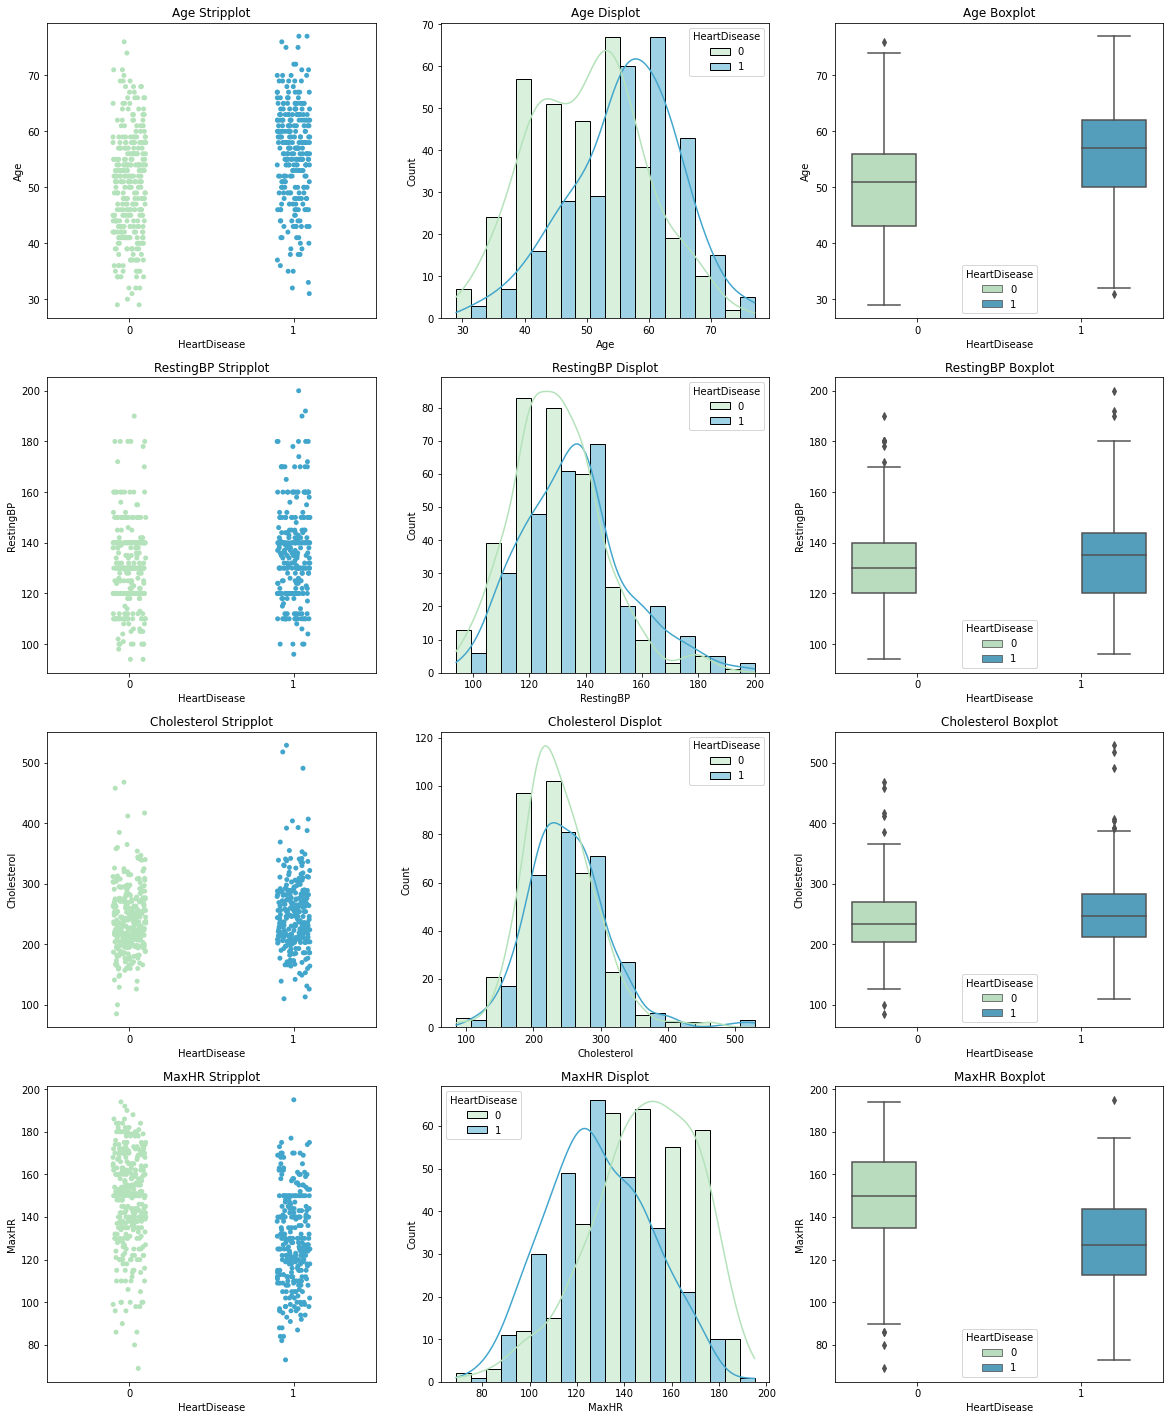

In [12]:
#This plot is from https://www.kaggle.com/code/sanchman/heart-failure-prediction-93-rec-88-acc-89-f1
fig, axes = plt.subplots(4, 3, figsize=(20,25))
for i, col in zip(range(4), numerical):
    sns.stripplot(ax=axes[i][0], x='HeartDisease', y=col, data=df_preprocessed, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=df_preprocessed, kde=True, bins=10, palette='GnBu', hue='HeartDisease', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='HeartDisease', y=col, data=df_preprocessed, palette='GnBu', hue='HeartDisease')
    axes[i][2].set_title(f'{col} Boxplot')

### 1.3 EDA Conclusion
From the Plots and Correlation Coefficients it seems as though Sex and Age alone could be good predictors, with older people and males suffering more frequently from a Heart Disease. A certain type of chest pain (ASY) seems to be very common in people with a heart disease. Also ST_Slope and MaxHR seem to be promising indicators.

## 2 Logistic LASSO Regression
### 2.1 Preprocessing
For the preprocessing we should look:
1. Missing Values (0 values in Cholesterol and Resting BP) 
2. Rescaling/Standardizing our numerical features
3. OneHot Encoding for Categorical Variables

In [103]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from group_lasso import GroupLasso


In [111]:
#Defining labels and features
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"].astype("int64")

#Numerical/Categorical Features:
numerical = X.select_dtypes(include="int64").columns.tolist()
categorical = X.select_dtypes(include="object").columns.tolist()
numerical_index = [X.columns.get_loc(col) for col in numerical]
categorical_index = [X.columns.get_loc(col) for col in categorical]

#Weird error with OneHotEncoder so need to convert to numpy
class NumpyTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.feature_names = X.columns.tolist()
        return self

    def transform(self, X, y=None):
        # Perform arbitary transformation
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        elif isinstance(X, np.ndarray):
            pass
        return X
    
    def get_feature_names_out(self, input_features=None):
        return self.feature_names

#Constructing Numerical Pipeline
numeric_transformer = Pipeline(steps= [("imputer", SimpleImputer(missing_values=0, strategy="median")), 
                                       ("scaler", StandardScaler())])

#Constructing Categorical Pipeline
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", categories="auto"))])

#Preporcessor
column_transformer = ColumnTransformer(transformers=[("num", numeric_transformer, numerical_index),
                                               ("cat", categorical_transformer, categorical_index)])
preprocessor = Pipeline(steps=[("numpy", NumpyTransformer()), ("column_transformer", column_transformer)])

#Constructing Pipeline
X_preprocessed = preprocessor.fit_transform(X)

#Fitting Model
model = GroupLasso()

In [105]:
#Coefficients and Importance
pd.DataFrame({"Features": preprocessor.get_feature_names_out(), "Coefficients": model.coef_[0]}).sort_values(by="Coefficients", ascending=False)

AttributeError: 'GroupLasso' object has no attribute 'coef_'

## 3 Decision Tree

In [134]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

In [112]:
preprocessor.transform(X)

array([[-1.43638941,  0.43219881,  0.8988581 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.75504037, -0.12474277,  0.78082568, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5866535 ,  0.32081049, -0.57654706, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.90530447, -1.23862593,  0.40705638, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.53768626,  0.65497544, -0.98966051, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36929939, -0.12474277, -2.20932877, ...,  1.        ,
         1.        ,  0.        ]])

In [131]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(preprocessor.transform(X), y, test_size=0.2, random_state=42)

# Fitting Model
clf_cv = GridSearchCV(clf, param_grid={"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv=5)
clf_cv.fit(X_train, y_train)
print("Best Parameters: ", clf_cv.best_params_)
print("Best Score: ", clf_cv.best_score_)

# Best Model
best_estimator = clf_cv.best_estimator_

# Feature Importance
print("Feature Importance: ")
pd.DataFrame({"Features": preprocessor.get_feature_names_out(), "Importance": best_estimator.feature_importances_}).sort_values(by="Importance", ascending=False)

Best Parameters:  {'max_depth': 3, 'min_samples_split': 2}
Best Score:  0.8313197160654788
Feature Importance: 


,Features,Importance
13,cat__ST_Slope_Up,0.728015
11,cat__ExerciseAngina_Y,0.112494
4,cat__Sex_M,0.086415
3,num__MaxHR,0.053291
8,cat__FastingBS_1,0.019785
0,num__Age,0.000000
1,num__RestingBP,0.000000
2,num__Cholesterol,0.000000
5,cat__ChestPainType_ATA,0.000000
6,cat__ChestPainType_NAP,0.000000


[Text(0.5, 0.875, 'cat__ST_Slope_Up <= 0.5\ngini = 0.495\nsamples = 587\nvalue = [265, 322]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'cat__Sex_M <= 0.5\ngini = 0.294\nsamples = 335\nvalue = [60, 275]\nclass = Heart Disease'),
 Text(0.125, 0.375, 'cat__ExerciseAngina_Y <= 0.5\ngini = 0.5\nsamples = 53\nvalue = [27, 26]\nclass = No Heart Disease'),
 Text(0.0625, 0.125, 'gini = 0.438\nsamples = 34\nvalue = [23, 11]\nclass = No Heart Disease'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Heart Disease'),
 Text(0.375, 0.375, 'num__MaxHR <= 1.593\ngini = 0.207\nsamples = 282\nvalue = [33, 249]\nclass = Heart Disease'),
 Text(0.3125, 0.125, 'gini = 0.187\nsamples = 277\nvalue = [29, 248]\nclass = Heart Disease'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No Heart Disease'),
 Text(0.75, 0.625, 'cat__ExerciseAngina_Y <= 0.5\ngini = 0.303\nsamples = 252\nvalue = [205, 47]\nclass = No Heart Disease'),
 Text(0.625, 0.375, 'cat__Fasti

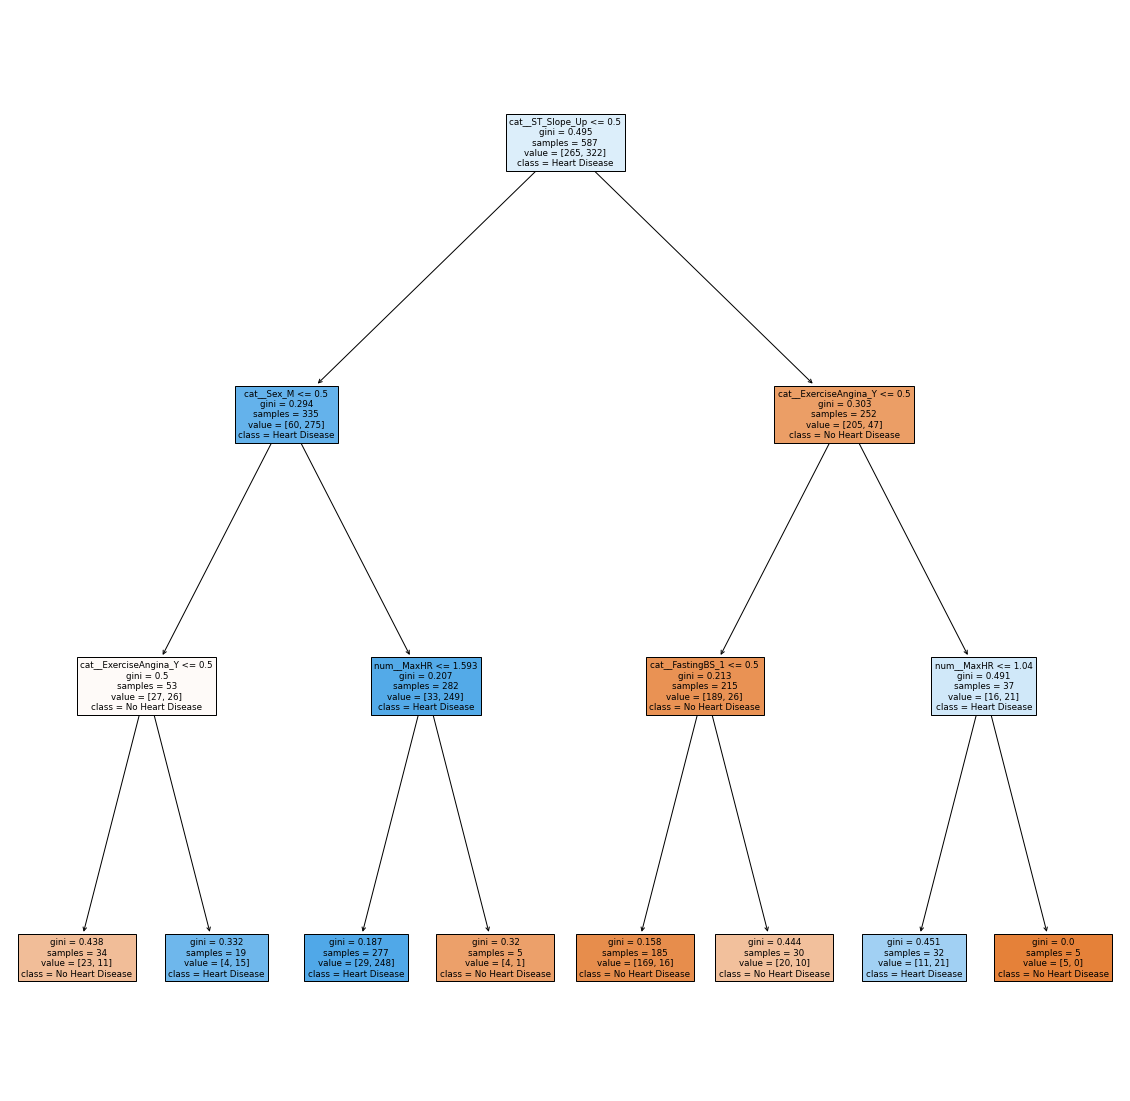

In [130]:
# Plotting Tree
plt.figure(figsize=(20, 20))
tree.plot_tree(best_estimator, feature_names=preprocessor.get_feature_names_out(), class_names=["No Heart Disease", "Heart Disease"], filled=True)

In [136]:
# Metrics

# Accuracy
accuracy = best_estimator.score(X_test, y_test)
print(accuracy)

# Confusion Matrix
y_pred = best_estimator.predict(X_test)
print("Confusion Matrix: ")
display(confusion_matrix(y_test, y_pred))

# F1 Score
print("F1 score: ", f1_score(y_test, y_pred))

# Recall
print("Recall: ", recall_score(y_test, y_pred))

# Precision
print("Precision: ", precision_score(y_test, y_pred))

0.8435374149659864
Confusion Matrix: 


array([[59, 12],
       [11, 65]], dtype=int64)

F1 score:  0.8496732026143792
Recall:  0.8552631578947368
Precision:  0.8441558441558441


With decision tree one has to be careful as not to overfit. Simply fitting them without max_depth and min_samples_split will lead to the algorithm building huge unpruned trees. These are not only overfitting to the data in a lot of cases, but are also hard to interpret due to their size. Doing 5-Fold CV led to the tree depicted above, which still has good metrics and is interpretable.
- Feature Importance: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. (From Sklearn Docs)
- According to the Gini Feature importance, ST_slope was able to greatly reduce uncertainty when predicting Heart Disease. 

## 4 MLP

In [156]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm, trange


In [174]:
#Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining Dataset
class HeartDiseaseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Defining Model
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Defining Hyperparameters
input_size = X_preprocessed.shape[1]
hidden_size = 100
output_size = 2
batch_size = 32
num_epochs = 100
learning_rate = 0.001

# Defining Dataloader
dataset = HeartDiseaseDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train.to_numpy()).long())
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Defining Model
model = HeartDiseaseModel(input_size, hidden_size, output_size)

# Defining Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Model
model.train()
for epoch in tqdm(range(num_epochs)):
    for batch_idx, (data, targets) in enumerate(dataloader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

100%|██████████| 100/100 [00:01<00:00, 50.39it/s]


In [175]:
# Predicting
model.eval()
with torch.no_grad():
    y_pred = model(torch.from_numpy(X_test).float().to(device))
    _, y_pred = y_pred.max(1)
    y_pred = y_pred.cpu().numpy()

# Metrics

#Accuracy
sum(y_pred == y_test.to_numpy()) / len(y_test)

# Confusion Matrix
print("Confusion Matrix: ")
display(confusion_matrix(y_test, y_pred))

# F1 Score
print("F1 score: ", f1_score(y_test, y_pred))

# Recall
print("Recall: ", recall_score(y_test, y_pred))

# Precision
print("Precision: ", precision_score(y_test, y_pred))

Confusion Matrix: 


array([[61, 10],
       [11, 65]], dtype=int64)

F1 score:  0.8609271523178809
Recall:  0.8552631578947368
Precision:  0.8666666666666667
